# Importing Data Packages

In [82]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Data preprocessing
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Reading dataset into DataFrame
data = pd.read_csv('./Titanic-Dataset.csv')

In [84]:
# Top 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# Column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
# stats of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  Data Preprocessing

### Handling Missing Values

What is Missing Data?

    Missing data means absence of observations in columns. 
    It appears in values such as “0”, “NA”, “NaN”, “NULL”, “Not Applicable”, “None”.

Two ways to solve missing values. There are,
- Deletion
- Imputation

In [88]:
# Splitting into different data types
numcol = data.select_dtypes(include=['int64', 'float64']).columns
objcol = data.select_dtypes(include=['object'])

In [89]:
print("Missing values and their percentage: ")
for column in data.columns:
    if data[column].isnull().any():
        print(f'Column: {column} - Values: {data[column].isnull().sum()} - Percentage: {round((data[column].isnull().sum())/data.shape[0]*100)}% - Type: {data[column].dtype}')

Missing values and their percentage: 
Column: Age - Values: 177 - Percentage: 20% - Type: float64
Column: Cabin - Values: 687 - Percentage: 77% - Type: object
Column: Embarked - Values: 2 - Percentage: 0% - Type: object


#### Using `dropna()` method  to remove missing value rows

In [90]:
# Deleting Row wise
data['Cabin'].dropna(inplace=True) # Don't use or use with caution(Too much of data lose)

# Deleting Column wise
data.drop(columns=['Cabin'], inplace=True) # 77% of data were missing in Cabin column

#### Using `fillna()` method function to remove missing value rows

In [91]:
data['Embarked'].fillna(value=data.Embarked.mode());

#### Using `SimpleImputer` class to handle missing values

Using Sklearn Imputers

strategy = {'mean', 'constant', 'most_frequent', 'median'}

In [92]:
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data[numcol] = impute_mean.fit_transform(data[numcol].values)

In [93]:
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Embarked'] = impute_mean.fit_transform(data[['Embarked']])

In [94]:
# for only one column (Simple Imputer, KNNImputer)
data['Age'] = impute_mean.fit_transform(data[['Age']])

#### Using `KNNImputer` to handle missing values

In [95]:
from sklearn.impute import KNNImputer
impute_KNN = KNNImputer(missing_values=np.nan, n_neighbors=5)
data[numcol] = impute_KNN.fit_transform(data[numcol].values)

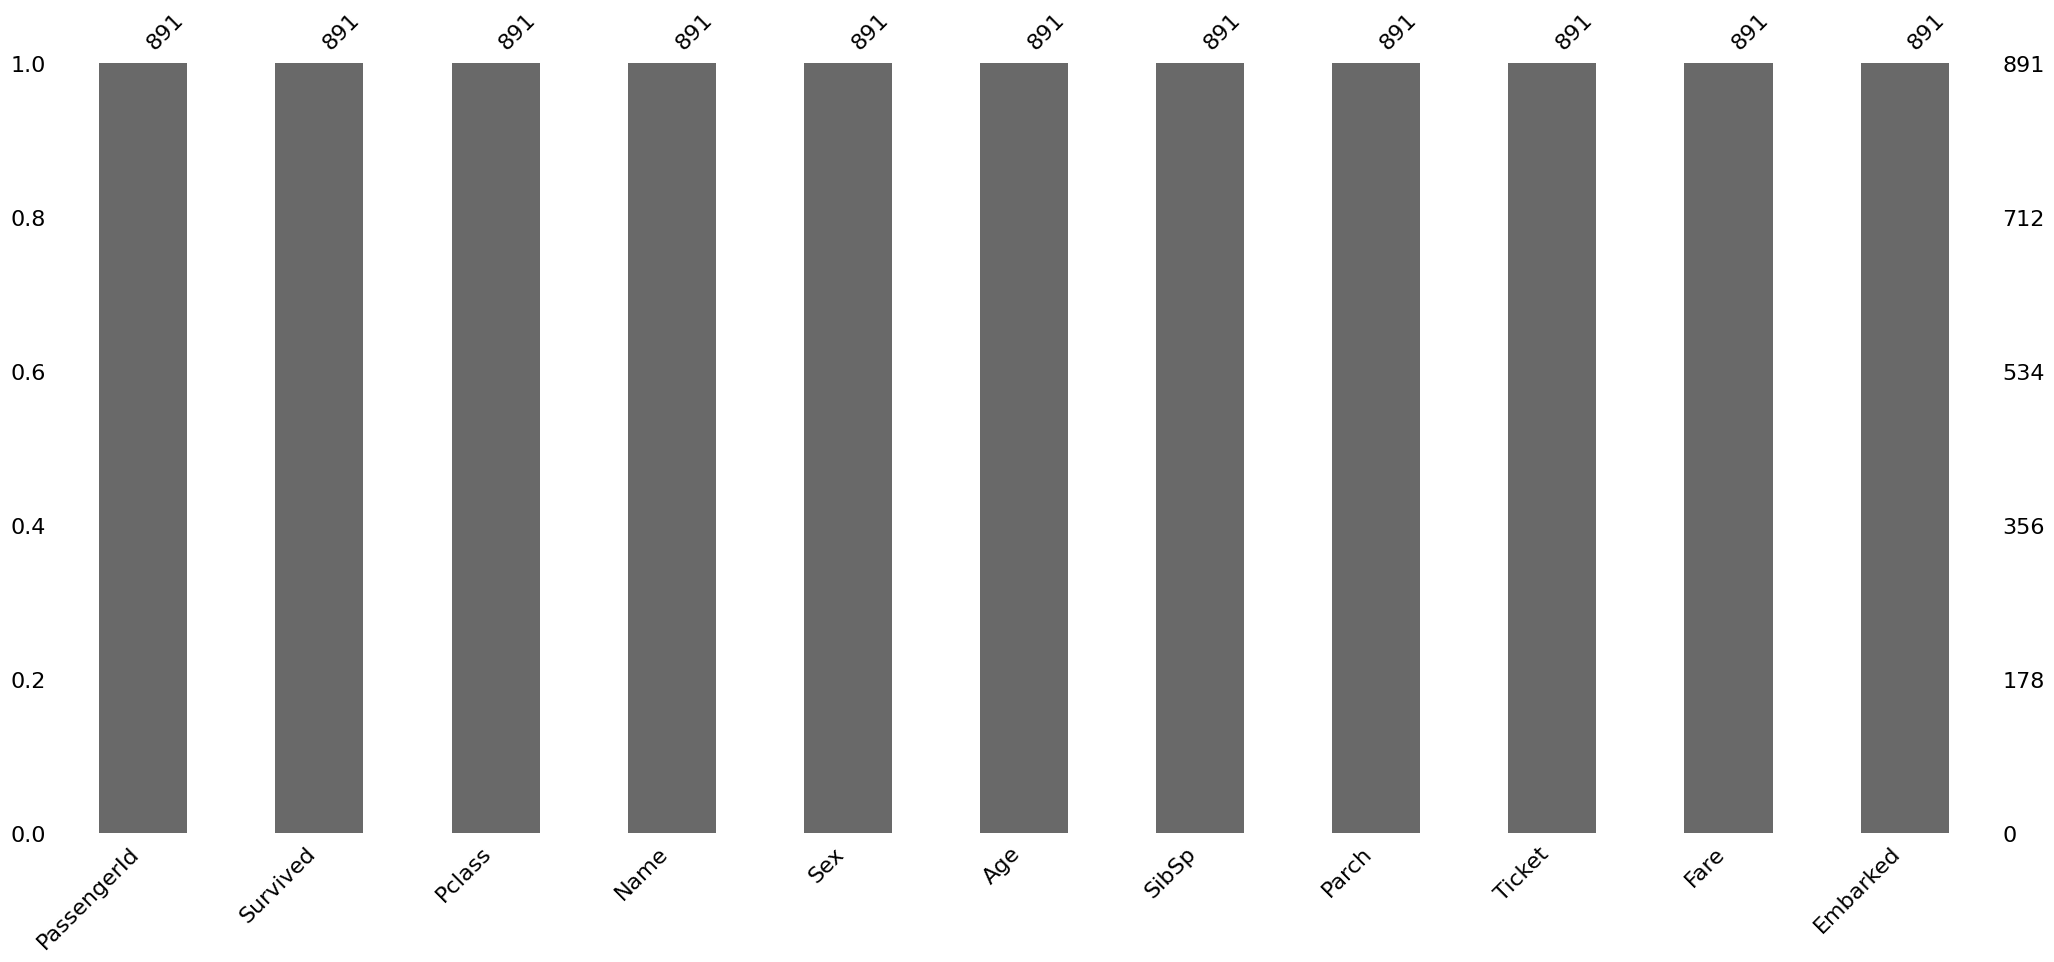

In [96]:
msno.bar(data);

## Duplicate Values

In [97]:
data[data.duplicated()] # There is no duplicated values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


## Handling Outliers

### Using Z-score to find Outliers

In [98]:
def outliers_zscore(data):
    mean = sum(data) / len(data) #np.mean(data)
    
    # Calculate the standard deviation of the data
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = variance ** 0.5 # np.std(data)
    
    outliers = []
    
    # Iterate through the data and identify any values with a z-score greater than 3
    for i, value in enumerate(data):
        z_score = (value - mean) / std_dev
        if z_score > 3:
            outliers.append(i)
    
    return outliers

### Using IQR to find outliers

In [99]:
def outliers_iqr(data):
    data = sorted(data)

    length = len(data)

    q1 = data[int(length * 0.25)]
    q3 = data[int(length * 0.75)]

    iqr = q3 - q1

    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    return [
        i
        for i, value in enumerate(data)
        if value < lower_bound or value > upper_bound
    ]

In [100]:
fare_out_iqr = outliers_iqr(data.Fare) # 115 outliers
fare_out_zscore = outliers_zscore(data.Fare) # 20 outliers
data.drop(fare_out_zscore, inplace=True) # we will use z-score outlier

In [101]:
outliers_zscore(data['Age'])

[94, 114, 483, 618, 660, 726, 831]

In [102]:
# Simple method using libraries(Z-score)
from scipy import stats
def zscore_simple(data):
    z = np.abs(stats.zscore(data))
    return (np.where(z>3))

zscore_simple(data['Age'])

(array([ 94, 114, 483, 618, 660, 726, 831]),)

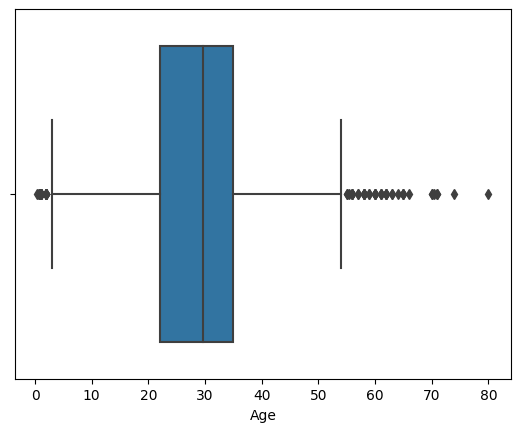

In [103]:
agebox_before = sns.boxplot(data=data, x='Age')

In [104]:
age_out = outliers_zscore(data.Age) # 7 outliers in Age column
data.drop(age_out, inplace=True)

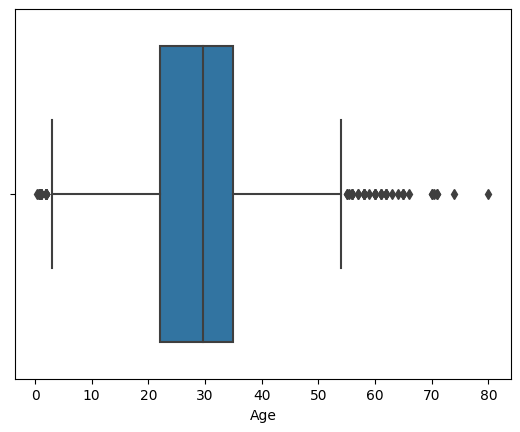

In [105]:
agebox_after = sns.boxplot(data=data, x='Age')

In [106]:
data.reset_index(drop=True).shape

(864, 11)

After cleaning the data now we have 864 rows.

## Feature Selection

In [107]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S


In [108]:
data.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023181,-0.027008,0.037795,-0.057087,0.004311,-0.008300
Survived,-0.023181,1.000000,-0.327549,-0.071972,-0.049213,0.079817,0.297316
Pclass,-0.027008,-0.327549,1.000000,-0.349012,0.100917,0.052319,-0.652279
Age,0.037795,-0.071972,-0.349012,1.000000,-0.230418,-0.188370,0.127200
SibSp,-0.057087,-0.049213,0.100917,-0.230418,1.000000,0.411732,0.242872
Parch,0.004311,0.079817,0.052319,-0.188370,0.411732,1.000000,0.233519
Fare,-0.008300,0.297316,-0.652279,0.127200,0.242872,0.233519,1.000000


### Selecting features

In [109]:
# We can either use iloc or loc
data = data.iloc[:, [2, 4, 5, 6, 7, -2, -1, 1]]
data = data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

## Data Encoding

In [110]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,male,22.0,1.0,0.0,7.2500,S,0.0
1,1.0,female,38.0,1.0,0.0,71.2833,C,1.0
2,3.0,female,26.0,0.0,0.0,7.9250,S,1.0
3,1.0,female,35.0,1.0,0.0,53.1000,S,1.0
4,3.0,male,35.0,0.0,0.0,8.0500,S,0.0


### using map and apply method to encoding categorical to numerical data

In [111]:
def gender_map(value):
    if value == 'male':
        return 0
    elif value == 'female':
        return 1
    else:
        return 2
    
data['Sex'].map(gender_map);
data['Sex'].apply(gender_map);


#### for a specific single column we can use LabelEncoder

In [112]:
from sklearn.preprocessing import LabelEncoder #only on series
encode = LabelEncoder()
data['Sex'] =  encode.fit_transform(data['Sex'].values)

In [113]:
# Splitting into different data types
numcol = data.select_dtypes(include=['int64', 'float64']).columns
objcol = data.select_dtypes(include=['object']).columns

#### for no. of categorical columns we can use OrdinalEncoder

In [114]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[objcol] = encoder.fit_transform(data[objcol])

In [115]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1,22.0,1.0,0.0,7.2500,2.0,0.0
1,1.0,0,38.0,1.0,0.0,71.2833,0.0,1.0
2,3.0,0,26.0,0.0,0.0,7.9250,2.0,1.0
3,1.0,0,35.0,1.0,0.0,53.1000,2.0,1.0
4,3.0,1,35.0,0.0,0.0,8.0500,2.0,0.0


## Scaling data

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:] = scaler.fit_transform(data.iloc[:])

In [117]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.804095,0.725604,-0.593522,0.443307,-0.46209,-0.657853,0.575348,-0.772685
1,-1.629314,-1.378161,0.647815,0.443307,-0.46209,1.534640,-1.993649,1.294188
2,0.804095,-1.378161,-0.283188,-0.466472,-0.46209,-0.634741,0.575348,1.294188
3,-1.629314,-1.378161,0.415064,0.443307,-0.46209,0.912046,0.575348,1.294188
4,0.804095,0.725604,0.415064,-0.466472,-0.46209,-0.630461,0.575348,-0.772685


## Splitting the data into features and target

In [118]:
features = data.drop(columns=['Survived'])
target = data['Survived']

### Train and Test Split

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(features, target, train_size=0.8, random_state = True)